Epoch 1/50
25/25 [==============================] - 12s 163ms/step - loss: 0.1045 - val_loss: 0.0784
Epoch 2/50
25/25 [==============================] - 2s 72ms/step - loss: 0.0667 - val_loss: 0.0598
Epoch 3/50
25/25 [==============================] - 2s 74ms/step - loss: 0.0342 - val_loss: 0.0047
Epoch 4/50
25/25 [==============================] - 2s 75ms/step - loss: 0.0084 - val_loss: 0.0019
Epoch 5/50
25/25 [==============================] - 2s 71ms/step - loss: 0.0060 - val_loss: 0.0012
Epoch 6/50
25/25 [==============================] - 2s 78ms/step - loss: 0.0051 - val_loss: 0.0016
Epoch 7/50
25/25 [==============================] - 2s 69ms/step - loss: 0.0042 - val_loss: 6.1950e-04
Epoch 8/50
25/25 [==============================] - 2s 70ms/step - loss: 0.0039 - val_loss: 8.5575e-04
Epoch 9/50
25/25 [==============================] - 2s 71ms/step - loss: 0.0038 - val_loss: 0.0012
Epoch 10/50
25/25 [==============================] - 2s 69ms/step - loss: 0.0031 - val_loss: 2.9053

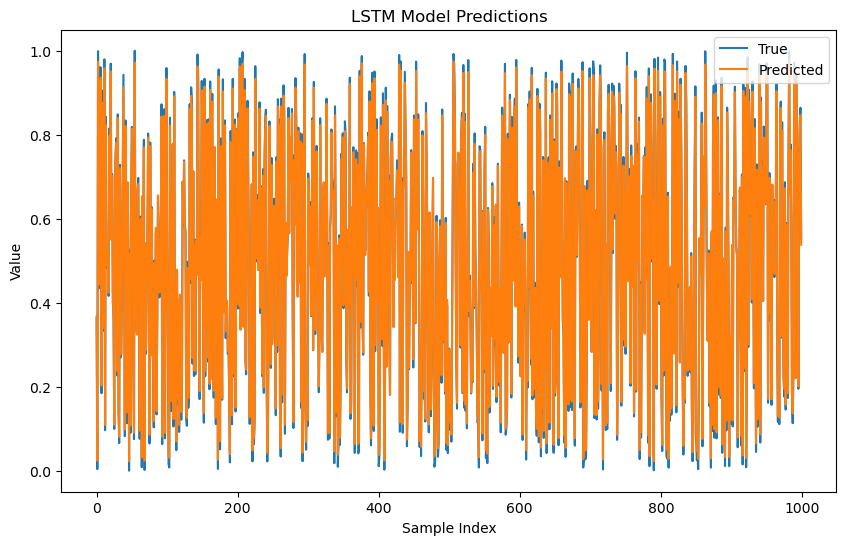

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Generate synthetic data for demonstration
def generate_synthetic_data(n_samples, n_steps, n_features):
    np.random.seed(0)
    data = np.random.rand(n_samples, n_steps, n_features)
    target = data[:, -1, 0]  # Simplified target: value at the last timestep
    return data, target

# Build LSTM model function
def build_lstm_model(input_shape, units, dropout_rate):
    model = Sequential([
        LSTM(units, return_sequences=True, input_shape=input_shape),
        Dropout(dropout_rate),
        LSTM(units, return_sequences=False),
        Dropout(dropout_rate),
        Dense(1)
    ])
    return model

# Model configuration
n_samples = 1000   # Number of samples in synthetic dataset
n_steps = 50       # Number of time steps in the input data
n_features = 1     # Number of features per timestep
units = 50         # Number of LSTM units
dropout_rate = 0.2 # Dropout rate
learning_rate = 0.01  # Learning rate
batch_size = 32    # Batch size
epochs = 50        # Number of epochs

# Generate synthetic data
X, y = generate_synthetic_data(n_samples, n_steps, n_features)

# Build the model
model = build_lstm_model(input_shape=(n_steps, n_features), units=units, dropout_rate=dropout_rate)

# Compile the model
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')

# Train the model on synthetic data
history = model.fit(X, y, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1)

# Dummy prediction for demonstration
predictions = model.predict(X)

# Plotting predictions against actual values
plt.figure(figsize=(10, 6))
plt.plot(y, label='True')
plt.plot(predictions, label='Predicted')
plt.title('LSTM Model Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()
